# Evaluate Reinforcement Learning agents
For a given environment and agent, run a number of episodes to evaluate the performance.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from envs.spot_env import SpotEnv
# from agents.random_agent import RandomAgent
# %load_ext autoreload
# %autoreload 2
# %aimport agents.policy_gradient_agent
from agents.policy_gradient_agent import PolicyGradientAgent
from session_runner import SessionRunner


In [2]:
# The environment
env = SpotEnv()

In [3]:
# The policy and the agent
# agent = RandomAgent(env.action_space)
agent = PolicyGradientAgent(env.observation_space, env.action_space, alpha=0.05)

In [4]:
print(env.prev_balance)

100.0


In [ ]:
state = env.reset()
state

In [ ]:
action = agent.act(state)
state, reward, done, _ = env.step(action)
print("State: %f , Action: %s Reward: %s" % (state, str(action),str(reward)))
agent.receive_reward(reward, done)
print(env.asset, env.cash)

In [12]:
# evaluate
nr_episodes = 60

runner = SessionRunner(env, agent)
performance = runner.run_session(nr_episodes)


performance


Episode 0
[ 91.64365098 106.29308336   2.14723583]
cash  254577370.44  asset   0.00 balance  254577370.44
147.4994517136635

Episode 13
[ 92.72360153 106.53717535   2.85713867]
cash  454977393.45  asset   0.00 balance  454977393.45
153.30588104969155

Episode 26
[ 92.26400506 106.01475859   1.52532442]
cash  352765526.21  asset   0.00 balance  352765526.21
150.7614397651469

Episode 39
[ 91.31916369 106.62657013   2.16642264]
cash  363877780.17  asset   0.00 balance  363877780.17
151.07158414473577

Episode 52
[ 92.16591736 108.01571436   2.05393397]
cash  400066213.17  asset   0.00 balance  400066213.17
152.0197043831574


{0: 147.4994517136635,
 1: 148.16730338152263,
 2: 151.19855957537985,
 3: 150.75435622403032,
 4: 152.28353377834142,
 5: 151.64430969563765,
 6: 151.64735097998008,
 7: 152.635513287655,
 8: 153.58661119497106,
 9: 153.23590850920905,
 10: 152.96569241311786,
 11: 153.2662574070923,
 12: 153.6046181881781,
 13: 153.30588104969155,
 14: 153.31006787647468,
 15: 153.16892194705,
 16: 152.78444561597888,
 17: 152.96194084217612,
 18: 152.77155205441557,
 19: 152.542235419112,
 20: 151.82515562403017,
 21: 152.6465784391539,
 22: 152.6582761389879,
 23: 152.22870527374863,
 24: 151.57537700432934,
 25: 151.60888623320966,
 26: 150.7614397651469,
 27: 148.2061685148631,
 28: 150.7665890781295,
 29: 150.33644657183183,
 30: 150.34272487329307,
 31: 150.6741231550518,
 32: 146.50911468570584,
 33: 147.70580840318593,
 34: 145.72850975884467,
 35: 145.3798618400484,
 36: 150.8435572886104,
 37: 149.95909934153616,
 38: 151.02167516550924,
 39: 151.07158414473577,
 40: 147.48458701715964,
 41

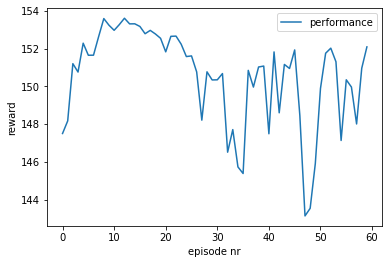

In [13]:
# plot_performance
plt.figure()
plt.plot(performance.keys(), performance.values(), label='performance')
plt.xlabel('episode nr')
plt.ylabel('reward')
plt.legend()
plt.show()

<AxesSubplot:>

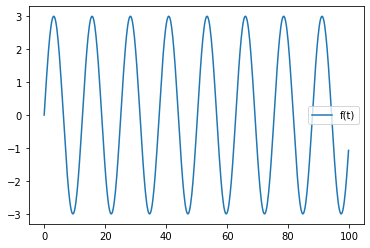

In [9]:
import pandas as pd

t = np.arange(0,100,0.2)
ft = 3 * np.sin(0.5 *t)

toplot = {'f(t)' : ft}

df = pd.DataFrame(toplot, index=t)

df.plot()

In [7]:
theta = agent.policy.theta
#agent.policy.theta[2] = 0.9
print(theta)

s_axis =  np.arange(88,112,0.5)
pi_func = np.array([agent.policy.policy_func(state) for state in s_axis])
h1 = pi_func[:,1]
print(h1.shape)

[ 91.57568549 104.85733624   2.04149274]
(48,)


<AxesSubplot:>

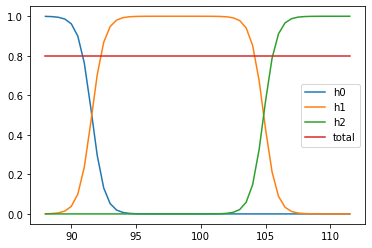

In [10]:


# action = agent.policy.select_action(state)
# grad_log_pi = agent.policy.grad_log(state)

data = {'h' + str(i) : pi_func[:,i] for i in range(3)}
data['total'] = data['h0'] + data['h1'] + data['h2'] - 0.2
df = pd.DataFrame(data, index=s_axis)
df.plot()